# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

In [7]:
ucard_no = 1719051 #ommitig 0's as it violates python syntax

#### Question 1 Answer

In [11]:
# Write the code for your answer here. You can use multiple cells to improve readability.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## 1a

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    
                                        download=False, transform=transform)     # Change download to true if not downloaded
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)   # change download to true if not downloaded
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
labels = [classes[idx] for idx in trainset.targets]

In [4]:
int_labels = np.array(trainset.targets)

In [5]:
cat_mask = int_labels == 3
cat_idxs = np.argwhere(np.asarray(cat_mask)).flatten()
dog_mask = int_labels == 5
dog_idxs = np.argwhere(np.asarray(dog_mask)).flatten() # pytorch is not supporting boolean masking

In [8]:
seed_obj = torch.manual_seed(ucard_no)

In [9]:
import numpy as np
np.max(trainset.data)

255

In [10]:
from matplotlib import pyplot as plt

In [11]:
train_tensor = torch.from_numpy(trainset.data).float()

## 1b

In [12]:
noise = torch.randn(train_tensor.shape)

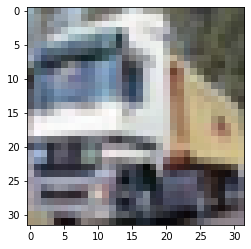

In [143]:
# Scaled image. Should obviously look same
plt.imshow(train_tensor[1]/255)

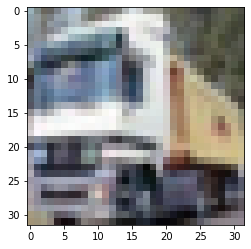

In [13]:
# Effect of noise is negligable
noised_tensor = train_tensor+noise
plt.imshow(noised_tensor[1]/255)

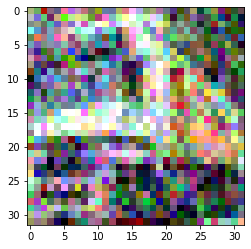

In [14]:
# Some good effect of noise is observed
noised_tensor2 = (train_tensor/255) + (noise*0.2)
noised_tensor2 = torch.clamp(noised_tensor2, max=1)
noised_tensor2 = torch.clamp(noised_tensor2, min=0)
plt.imshow(noised_tensor2[1])

## 1c

In [15]:
train_tensor[[False for i in range(50000)]].shape

torch.Size([0, 32, 32, 3])

In [16]:
np.sum(cat_mask)

5000

In [17]:
cat_idx = np.argwhere(np.asarray(cat_mask))

In [18]:
train_tensor[cat_idx].shape

torch.Size([5000, 1, 32, 32, 3])

In [21]:
from sklearn.utils import shuffle

CatDog_idxs = shuffle(list(cat_idxs)+list(dog_idxs), random_state=ucard_no)
CatDog = train_tensor[CatDog_idxs]

## 1d

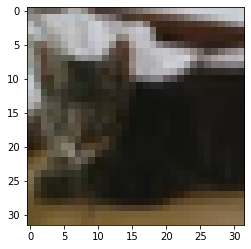

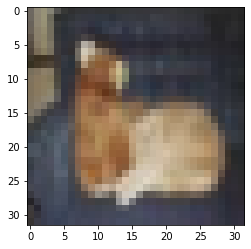

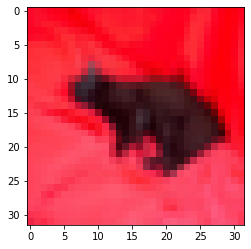

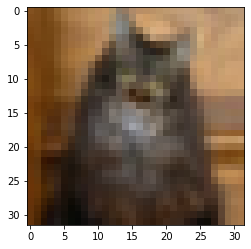

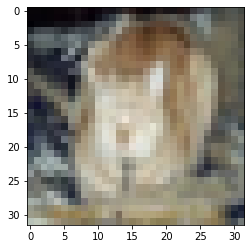

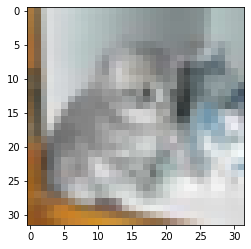

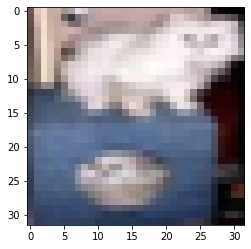

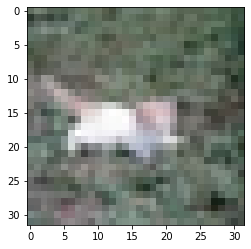

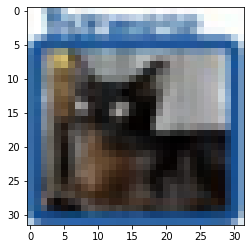

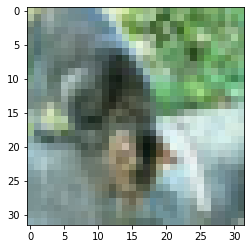

In [217]:
cats = train_tensor[cat_idxs]

for i in range(10):
    plt.figure(i)
    plt.imshow(cats[i]/255)
        



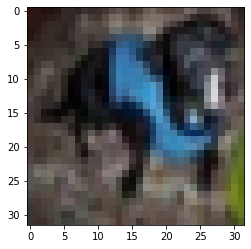

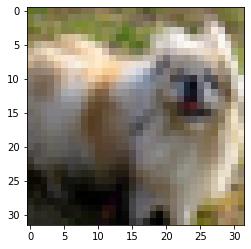

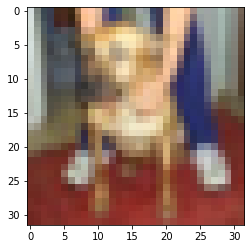

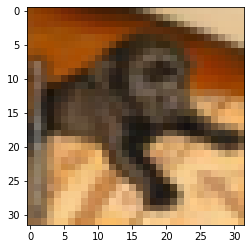

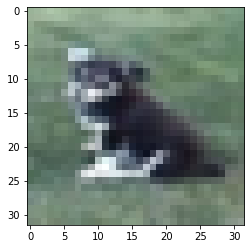

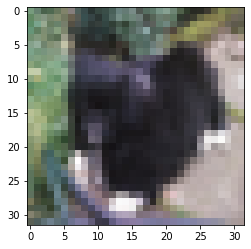

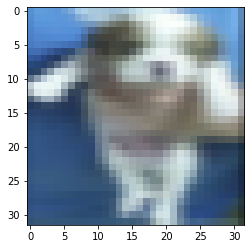

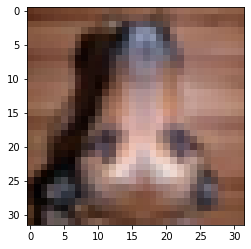

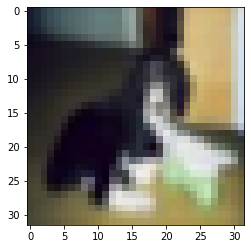

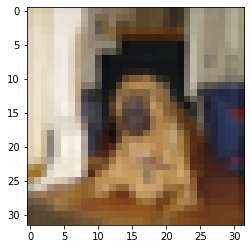

In [218]:
dogs = train_tensor[dog_idxs]

for i in range(10):
    plt.figure(i)
    plt.imshow(dogs[i]/255)
        

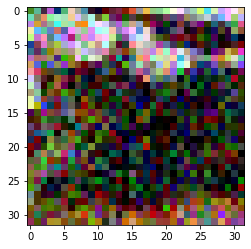

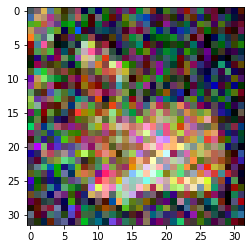

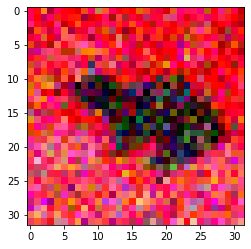

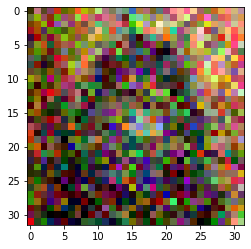

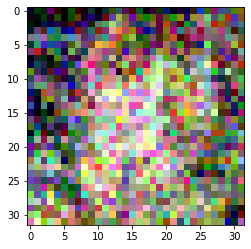

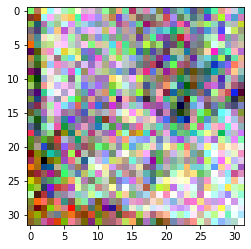

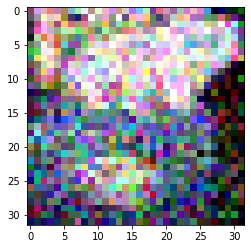

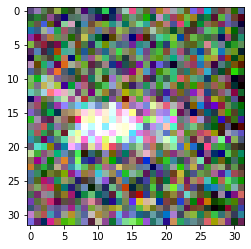

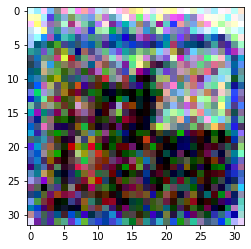

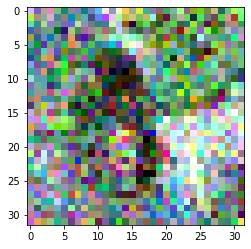

In [220]:
noised_cats = noised_tensor2[cat_idxs]

for i in range(10):
    plt.figure(i)
    plt.imshow(noised_cats[i])
        

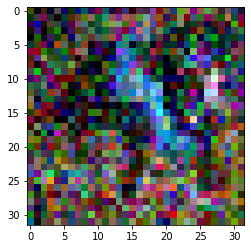

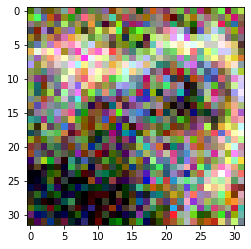

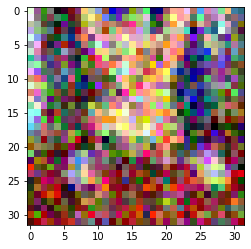

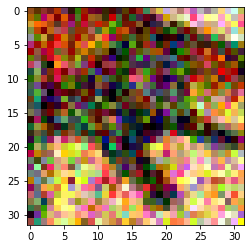

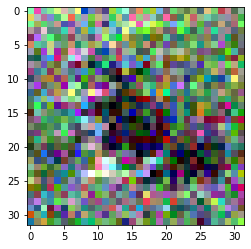

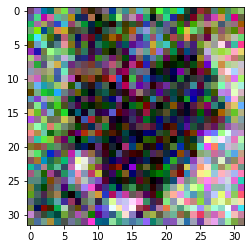

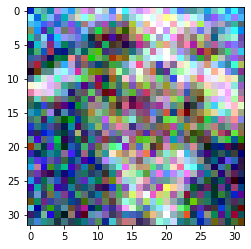

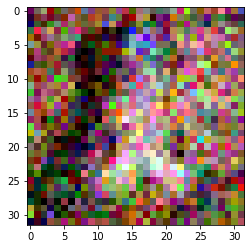

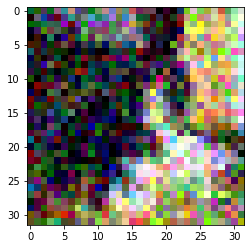

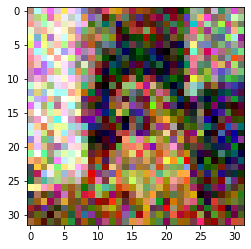

In [221]:
noised_dogs = noised_tensor2[dog_idxs]

for i in range(10):
    plt.figure(i)
    plt.imshow(noised_dogs[i])

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes classifiers: one on the original features (raw pixels), and seven on the seven different PCA features in 2a. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [12]:
# Write the code for your answer here. You can use multiple cells to improve readability.

## 2a

In [22]:
from sklearn.decomposition import PCA

cd_labels = np.array(trainset.targets)[CatDog_idxs]

In [23]:
CatDog = CatDog/255

In [24]:
torch.max(CatDog)

tensor(1.)

In [25]:
torch.min(CatDog)

tensor(0.)

In [26]:
cd_labels

array([5, 5, 5, ..., 5, 5, 3])

In [27]:
pca = PCA()
pca_data = pca.fit_transform(CatDog.reshape(10000,-1))

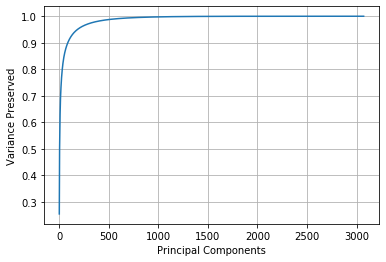

In [28]:
from matplotlib import pyplot as plt

plt.clf()
plt.plot(range(1,pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Variance Preserved')
plt.show()

**As 500 components is preserving more than 98% of variance and 200 components are preserving more than 90% of variance, would like to choose features in that range.**

## 2b

In [29]:
int_labels = np.array(testset.targets)
cat_mask = int_labels == 3
cat_idxs_test = np.argwhere(np.asarray(cat_mask)).flatten()
dog_mask = int_labels == 5
dog_idxs_test = np.argwhere(np.asarray(dog_mask)).flatten() # pytorch is not supporting boolean masking

CatDog_idxs_test = shuffle(list(cat_idxs_test)+list(dog_idxs_test), random_state=ucard_no)
CatDog_test = torch.from_numpy(testset.data)[CatDog_idxs_test]

In [30]:
cd_labels_test = np.array(testset.targets)[CatDog_idxs_test]

In [31]:
from sklearn.naive_bayes import GaussianNB

models = [GaussianNB() for _ in range(7)]
components_range = [200, 500, 800, 1000, 1500, 2000, 2500]
for model_, comp_ in zip(models, components_range):
    model_.fit(pca_data[:,:comp_], cd_labels)

In [32]:
raw_data_model = GaussianNB().fit(CatDog.reshape(10000,-1), cd_labels)

**Reason for choosing naive bayes gaussian model - As guassian model deals with continuous features.**

In [33]:
CatDog_test = CatDog_test/255

In [34]:
test_score_raw_model = raw_data_model.score(CatDog_test.reshape(CatDog_test.shape[0], -1), cd_labels_test)

## 2c

In [35]:
pca_data_test = pca.transform(CatDog_test.reshape(CatDog_test.shape[0],-1))

In [36]:
test_scores = []
for model_, comp_ in zip(models, components_range):
    test_scores.append(model_.score(pca_data_test[:,:comp_], cd_labels_test))

In [38]:
test_scores

[0.493, 0.498, 0.5015, 0.4855, 0.4905, 0.517, 0.516]

In [39]:
final_test_scores = test_scores + [test_score_raw_model]

In [41]:
final_test_scores

[0.493, 0.498, 0.5015, 0.4855, 0.4905, 0.517, 0.516, 0.5]

Text(0.5, 1.0, 'Bayes model test performace')

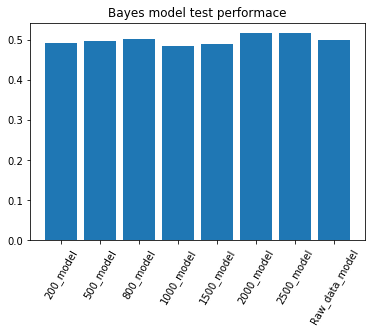

In [43]:
x_labels = components_range+['Raw_data']
x_labels = [str(val_)+'_model' for val_ in x_labels]
plt.bar(x_labels, final_test_scores)
plt.xticks(rotation=60)
plt.title('Bayes model test performace')

## 2d

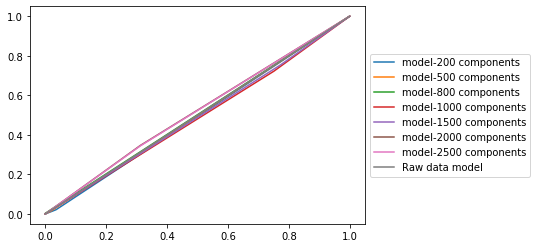

In [326]:
# https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python

from sklearn import metrics

def convert_to_binary(lis):
    cat=0
    dog=1
    return [1 if x==5 else 0 for x in lis]

plt.figure(0).clf()
auc_scores = []
cd_labels_test_bin = convert_to_binary(cd_labels_test)

for model_, comp_ in zip(models, components_range):
    preds = model_.predict(pca_data_test[:,:comp_])
    fpr, tpr, tres = metrics.roc_curve(cd_labels_test_bin, convert_to_binary(preds))
    auc_scores.append(metrics.roc_auc_score(cd_labels_test_bin, convert_to_binary(preds)))
    plt.plot(fpr, tpr, label=f'model-{comp_} components')

    
preds = raw_data_model.predict(CatDog_test.reshape(CatDog_test.shape[0], -1))
fpr, tpr, tres = metrics.roc_curve(cd_labels_test_bin, convert_to_binary(preds))
auc_scores.append(metrics.roc_auc_score(cd_labels_test_bin, convert_to_binary(preds)))
plt.plot(fpr, tpr, label='Raw data model')

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



## 2e

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

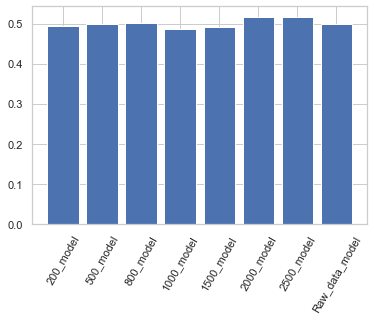

In [337]:
# import seaborn as sns
# sns.set(style="whitegrid")

# sns.barplot(x=components_range+['Raw_data_model'], y=auc_scores)
x_labels = components_range+['Raw_data']
x_labels = [str(val_)+'_model' for val_ in x_labels]
plt.bar(x_labels, auc_scores)
plt.xticks(rotation=60)

In [342]:
test_score_raw_model

0.5

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

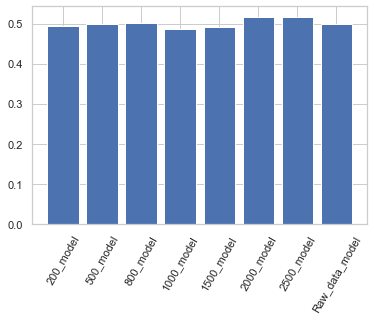

In [340]:
plt.bar(x_labels, final_test_scores)
plt.xticks(rotation=60)

## 2f

### Observations

- 500 principal components are explaining more than 98 percent of variance
- In terms of computation time and test performance, the model with 2000 principal components is the best one.
- The models with less than 800 principal components are performing worse than the dummy classifier.


### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on the three different PCA features in 3b); **four Logistic Regression** classifiers (one on the original features, and three on the three different PCA features in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [13]:
# Write the code for your answer here. You can use multiple cells to improve readability.

## 3a

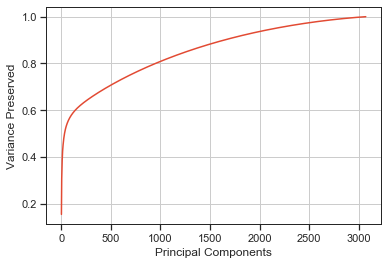

In [349]:
import seaborn as sns
sns.set_style('ticks')

CatDog = noised_tensor2[CatDog_idxs]
pca = PCA()
pca_data = pca.fit_transform(CatDog.reshape(10000,-1))

plt.clf()
plt.plot(range(1,pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Variance Preserved')
plt.show()

In [352]:
components_range_noise = [500, 700, 1000, 1500, 1800, 2000,2200, 2500, 2800, 3000]
for comp_ in components_range_noise:
    preserved_var = np.cumsum(pca.explained_variance_ratio_[:comp_])[-1]
    print(f'Variance preserved at {comp_} is - {preserved_var}')

Variance preserved at 500 is - 0.7074029031207948
Variance preserved at 700 is - 0.7520298278954297
Variance preserved at 1000 is - 0.8088399941268668
Variance preserved at 1500 is - 0.8828750396486525
Variance preserved at 1800 is - 0.917298558714033
Variance preserved at 2000 is - 0.9366955156272286
Variance preserved at 2200 is - 0.9535117914591097
Variance preserved at 2500 is - 0.9742629517466243
Variance preserved at 2800 is - 0.9900267628689395
Variance preserved at 3000 is - 0.9978136794456647


- Picked some random components from the graph to observe the variance
- 2200 components are preserving more than 95 percent of variance

In [357]:
models_noise = [GaussianNB() for _ in range(7)]
components_range_noise = [1500, 1800, 2000,2200, 2500, 2800, 3000]
for model_, comp_ in zip(models_noise, components_range_noise):
    model_.fit(pca_data[:,:comp_], cd_labels)

- filtered the data with 1500, 1800, 2000,2200, 2500, 2800, 3000 to observe the model performance between 85% to 99% of feature variance

In [351]:
raw_data_model_noise = GaussianNB().fit(CatDog.reshape(10000,-1), cd_labels)

In [356]:
pca_data_test.shape

(2000, 3072)

In [359]:
models_noise[0].score(pca_data_test[:,:1500], cd_labels_test)

0.4955

In [362]:
pca_data_test = pca.transform(CatDog_test.reshape(CatDog_test.shape[0],-1))

test_scores_noise = []
for model_, comp_ in zip(models_noise, components_range_noise):
    test_scores_noise.append(model_.score(pca_data_test[:,:comp_], cd_labels_test))

In [365]:
test_scores_noise.append(raw_data_model_noise.score(CatDog_test.reshape(CatDog_test.shape[0], -1), cd_labels_test))

In [366]:
test_scores_noise

[0.4955, 0.494, 0.493, 0.4925, 0.4925, 0.492, 0.493, 0.5]

In [367]:
x_labels = components_range_noise+['Raw_data']
x_labels = [str(val_)+'_model' for val_ in x_labels]

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

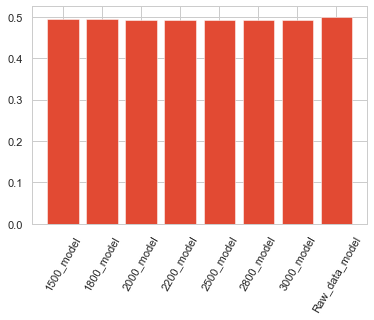

In [369]:
sns.set_style('whitegrid')
plt.bar(x_labels, test_scores_noise)
plt.xticks(rotation=60)

## 3b

In [6]:
torch.max(train_tensor/255)

tensor(1.)

In [7]:
torch.min(train_tensor/255)

tensor(0.)

In [10]:
train_tensor.reshape(10000,-1).shape

torch.Size([10000, 15360])

In [11]:
train_tensor.shape

torch.Size([50000, 32, 32, 3])

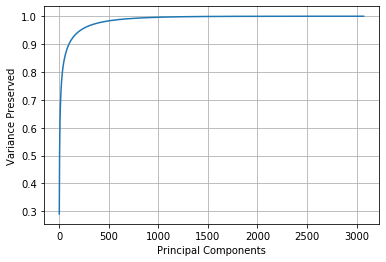

In [13]:
train_tensor = train_tensor/255
pca = PCA()
pca_data = pca.fit_transform(train_tensor.reshape(50000,-1))

plt.clf()
plt.plot(range(1,pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Variance Preserved')
plt.show()

**From the graph it seems, 500 components are preserving 98% of variance hence would be checking the performance of model around of 500 components**

## 3c

In [17]:
components_range_noise = [100, 500, 700, 1000, 1500, 1800, 2000,2200, 2500]
for comp_ in components_range_noise:
    preserved_var = np.cumsum(pca.explained_variance_ratio_[:comp_])[-1]
    print(f'Variance preserved at {comp_} is - {preserved_var}')

Variance preserved at 100 is - 0.9010623225498154
Variance preserved at 500 is - 0.9834944426010315
Variance preserved at 700 is - 0.9912009680618582
Variance preserved at 1000 is - 0.9963864691662528
Variance preserved at 1500 is - 0.9991919879762461
Variance preserved at 1800 is - 0.9996737062261231
Variance preserved at 2000 is - 0.9998240826482045
Variance preserved at 2200 is - 0.9999075296358674
Variance preserved at 2500 is - 0.9999686585738399


**Intrested components to consider from the above scores are 100, 500 and 700 as due to slight increase in components, huge increase is observed in variance**

In [22]:
int_labels = np.array(trainset.targets)

In [43]:
from sklearn.naive_bayes import GaussianNB
import time

models_bayes = [GaussianNB() for _ in range(3)]
components_range_bayes = [100, 500, 700]
start_time = time.time()
for model_, comp_ in zip(models_bayes, components_range_bayes):
    model_.fit(pca_data[:,:comp_], int_labels)
train_time_naive = time.time() - start_time

In [44]:
start_time = time.time()
model_bayes_all_feat = GaussianNB().fit(train_tensor.reshape(50000,-1), int_labels)
train_time_naive2 = time.time()-start_time

In [34]:
model_bayes_all_feat.score(train_tensor.reshape(50000,-1), int_labels)

0.28472

In [45]:
from sklearn.linear_model import LogisticRegression

models_lr = [LogisticRegression() for _ in range(3)]
components_range_bayes = [100, 500, 700]
start_time = time.time()
for model_, comp_ in zip(models_lr, components_range_bayes):
    model_.fit(pca_data[:,:comp_], int_labels)
train_time_lr = time.time()-start_time

C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

In [46]:
start_time = time.time()
lr_model_all_feat = LogisticRegression().fit(train_tensor.reshape(50000,-1), int_labels)  # Flattening the 3d image to 1d vector
train_time_lr2 = time.time()-start_time

C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [41]:
# Defining a cnn

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
#         print(f'output of 2nd pooling layer shape - {x.shape}')
        x = x.view(-1, 16 * 5 * 5)
#         print(f'input shape for fc1-{x.shape}')
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.259
[1,  4000] loss: 2.039
[1,  6000] loss: 1.909
[1,  8000] loss: 1.753
[1, 10000] loss: 1.638
[1, 12000] loss: 1.573
[2,  2000] loss: 1.483
[2,  4000] loss: 1.464
[2,  6000] loss: 1.427
[2,  8000] loss: 1.395
[2, 10000] loss: 1.408
[2, 12000] loss: 1.377
Finished Training


In [47]:
# Running for 2 more epochs to calculate time - total time would be 2*this time
start_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
train_time_dnn = time.time()-start_time
print('Finished Training')


[1,  2000] loss: 1.296
[1,  4000] loss: 1.322
[1,  6000] loss: 1.302
[1,  8000] loss: 1.279
[1, 10000] loss: 1.290
[1, 12000] loss: 1.261
[2,  2000] loss: 1.193
[2,  4000] loss: 1.219
[2,  6000] loss: 1.193
[2,  8000] loss: 1.202
[2, 10000] loss: 1.192
[2, 12000] loss: 1.217
Finished Training


In [99]:
# Evaluating the DNN on test set
start_time = time.time()
dnn_test_score = None
dnn_preds = []

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        dnn_preds.extend(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
dnn_test_time = time.time()-start_time
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [49]:
train_time_bayes = train_time_naive+train_time_naive2
train_time_lr = train_time_lr+train_time_lr2

## 3d

([0, 1, 2], <a list of 3 Text xticklabel objects>)

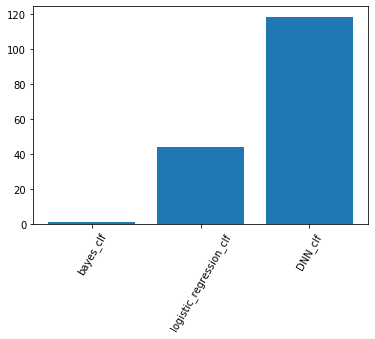

In [53]:
plt.bar(['bayes_clf', 'logistic_regression_clf', 'DNN_clf'], [train_time_bayes/4, train_time_lr/4, train_time_dnn])
plt.xticks(rotation=60)    # DNN time is for 4 epochs. for 2 epochs it would be almost similar to lr model

In [55]:
test_tensor = torch.from_numpy(testset.data).float()/255
pca_data_test = pca.transform(test_tensor.reshape(test_tensor.shape[0], -1))

In [56]:
test_labels = np.array(testset.targets)

In [64]:
test_scores_bayes = []
start_time = time.time()
for model_, comp_ in zip(models_bayes, components_range_bayes):
    test_scores_bayes.append(model_.score(pca_data_test[:,:comp_], test_labels))
test_time_naive = time.time() - start_time

In [65]:
start_time = time.time()
test_scores_bayes.append(model_bayes_all_feat.score(test_tensor.reshape(test_tensor.shape[0], -1), test_labels))
test_time_naive2 = time.time() - start_time

In [63]:
test_scores_bayes

[0.1051, 0.1088, 0.1046, 0.1013]

In [66]:
test_scores_lr = []
start_time = time.time()
for model_, comp_ in zip(models_lr, components_range_bayes):
    test_scores_lr.append(model_.score(pca_data_test[:,:comp_], test_labels))
test_time_lr = time.time() - start_time

start_time = time.time()
test_scores_lr.append(model_bayes_all_feat.score(test_tensor.reshape(test_tensor.shape[0], -1), test_labels))
test_time_lr2 = time.time() - start_time

In [68]:
test_times = [(test_time_naive+test_time_naive2)/4, (test_time_lr+test_time_lr2)/4, dnn_test_time]

Text(0.5, 1.0, 'Test Timings')

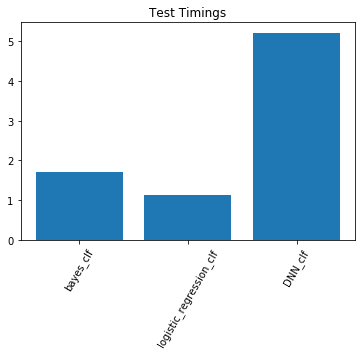

In [71]:
plt.bar(['bayes_clf', 'logistic_regression_clf', 'DNN_clf'], test_times)
plt.xticks(rotation=60)    
plt.title('Test Timings')

Text(0.5, 1.0, 'Test Scores')

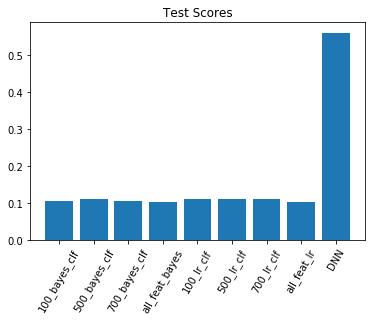

In [80]:
labels_ = [str(_)+'_bayes_clf' for _ in components_range_bayes] + ['all_feat_bayes']+ [str(_)+'_lr_clf' for _ in components_range_bayes] +['all_feat_lr'] + ['DNN']
test_scores_all = test_scores_bayes+test_scores_lr+[0.56]

plt.bar(labels_, test_scores_all)
plt.xticks(rotation=60)    
plt.title('Test Scores')

In [78]:
len(labels_)

9

In [79]:
test_scores_all

[0.1051, 0.1088, 0.1046, 0.1013, 0.1099, 0.1101, 0.1101, 0.1013, '0.56']

In [89]:
classes

('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

In [90]:
test_labels

array([3, 8, 8, ..., 5, 1, 7])

In [91]:
test_labels_str = [classes[idx] for idx in test_labels]

## 3e

Text(0.5, 1, 'DNN Model')

<Figure size 432x288 with 0 Axes>

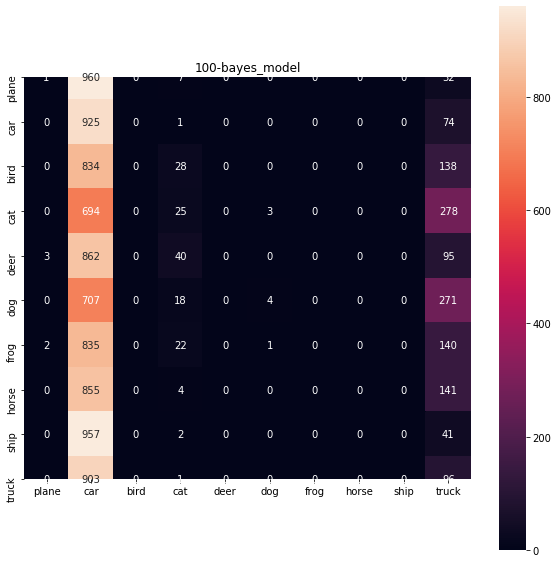

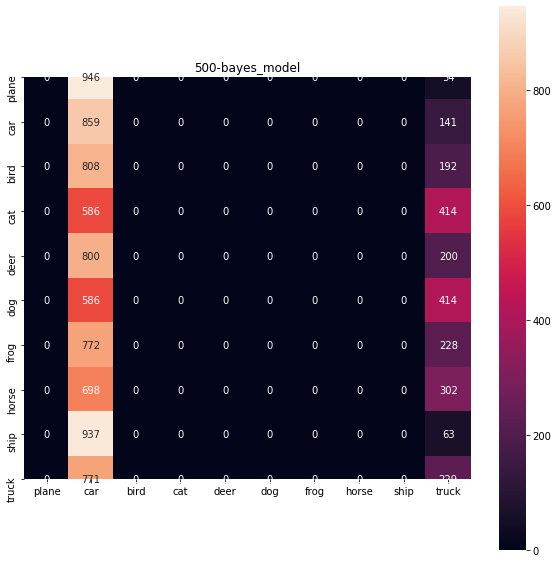

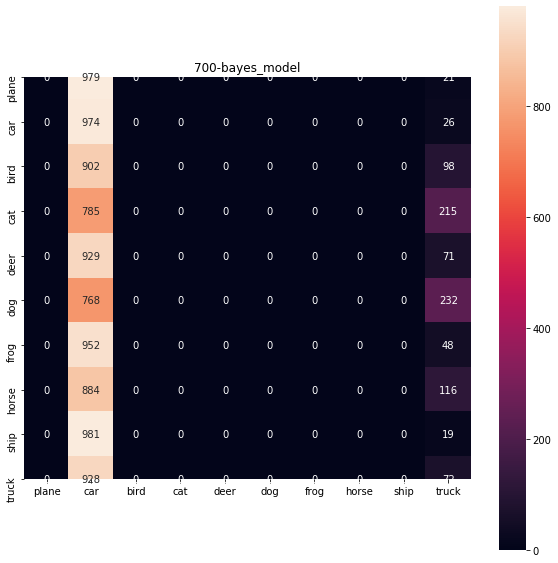

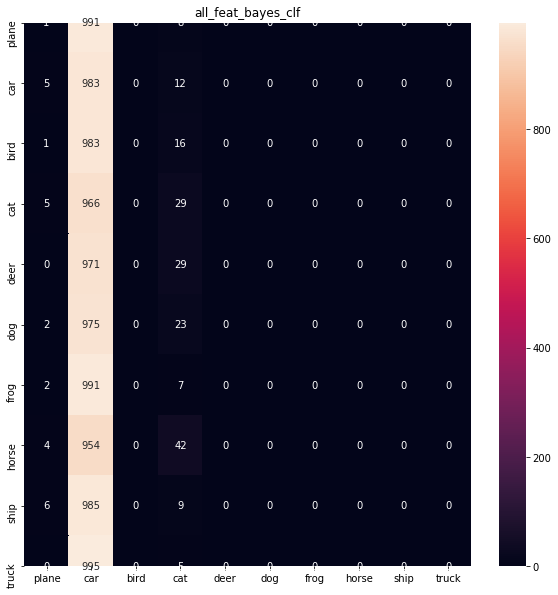

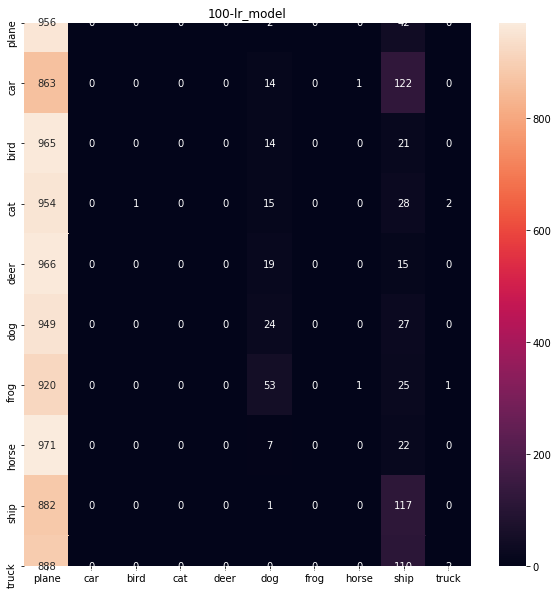

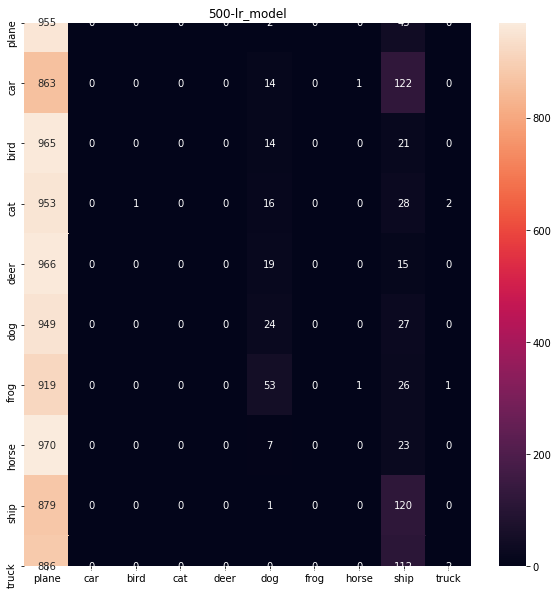

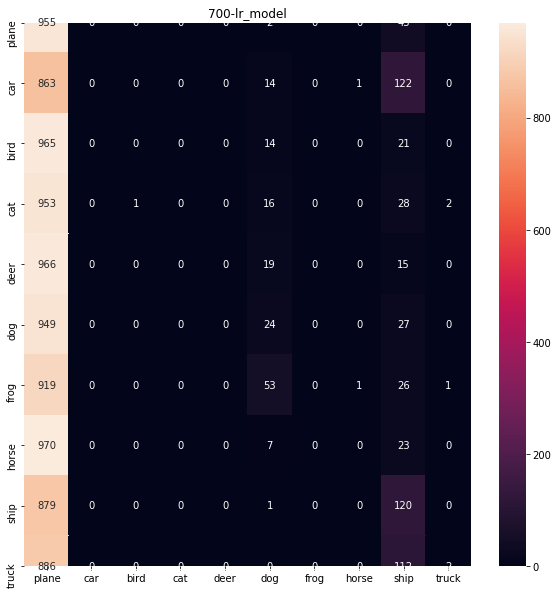

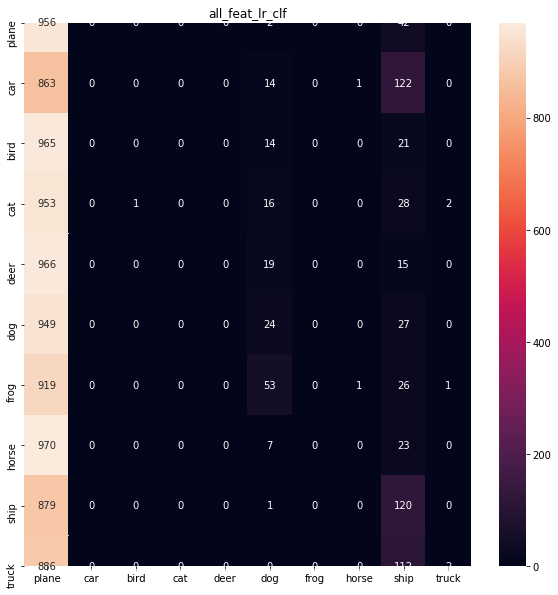

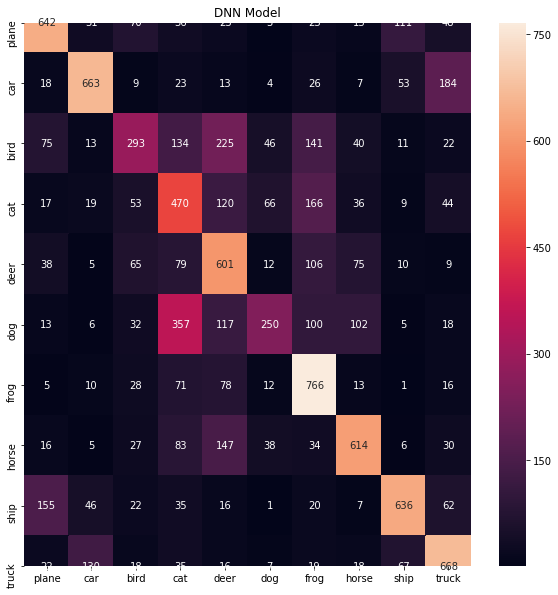

In [106]:
# code ref - matplotlib documentation

from sklearn.metrics import confusion_matrix
import pandas as pd

figs_count = 1
# Looping through the models naive bayes
for model_, comp_ in zip(models_bayes, components_range_bayes):
    preds = model_.predict(pca_data_test[:,:comp_])
    mat = confusion_matrix(test_labels, preds)
    plt.figure(figs_count)
    plt.figure(figsize = (10, 10))
    sns.heatmap(pd.DataFrame(mat, columns=classes, index=classes), annot=True, square=True, fmt='d')
    figs_count += 1
    plt.title(f'{comp_}-bayes_model')

preds = model_bayes_all_feat.predict(test_tensor.reshape(test_tensor.shape[0], -1))
mat = confusion_matrix(test_labels, preds)
plt.figure(figs_count)
plt.figure(figsize = (10, 10))
sns.heatmap(pd.DataFrame(mat, columns=classes, index=classes), annot=True, fmt='d')
figs_count += 1
plt.title('all_feat_bayes_clf')

# looping through models lr
for model_, comp_ in zip(models_lr, components_range_bayes):
    preds = model_.predict(pca_data_test[:,:comp_])
    mat = confusion_matrix(test_labels, preds)
    plt.figure(figs_count)
    plt.figure(figsize = (10, 10))
    sns.heatmap(pd.DataFrame(mat, columns=classes, index=classes), annot=True, fmt='d')
    figs_count += 1
    plt.title(f'{comp_}-lr_model')

preds = lr_model_all_feat.predict(test_tensor.reshape(test_tensor.shape[0], -1))
mat = confusion_matrix(test_labels, preds)
plt.figure(figs_count)
plt.figure(figsize = (10, 10))
sns.heatmap(pd.DataFrame(mat, columns=classes, index=classes), annot=True, fmt='d')
figs_count += 1
plt.title(f'all_feat_lr_clf')


preds = dnn_preds
mat = confusion_matrix(test_labels, preds)
plt.figure(figs_count)
plt.figure(figsize = (10,10))
sns.heatmap(pd.DataFrame(mat, columns=classes, index=classes), annot=True, fmt='d')
figs_count += 1
plt.title(f'DNN Model')


In [107]:
sum(1 for _ in test_labels_str if _=='cat' ) 

1000

## 3f

- The bayes classifiers did not fit properly and  tries to predict every image as car
- The Logistic Regression classifiers did not fit properly and tries to predict every image as plane
- In contrast to the above classfiers, Despite of more training time and more testing time the DNN generalised well enough for all the classes. It got test accuracy of 56% on just 4 epochs.



### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [14]:
# Write the code for your answer here. You can use multiple cells to improve readability.

## 4a

In [127]:
# Creating the tensors again as kernal got restarted.

train_tensor = torch.from_numpy(trainset.data).float()/255
noised_tensor = train_tensor+(noise*0.2)
noised_tensor = torch.clamp(noised_tensor, 0, 1)

In [122]:
torch.max(noised_tensor)  #values must always be in the range of [0,1]. So need to clip the noise range

tensor(1.)

In [123]:
torch.min(noised_tensor)

tensor(0.)

In [124]:
# Code borrowed from assignment 7 and modified input and output layers
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 3 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),  #Creating 3 output channels
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [125]:
myAE=Autoencoder()
print(myAE)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)


In [126]:
noised_tensor.shape

torch.Size([50000, 32, 32, 3])

In [129]:
noised_tensor[1].shape

torch.Size([32, 32, 3])

In [130]:
train_tensor

tensor([[[[0.2314, 0.2431, 0.2471],
          [0.1686, 0.1804, 0.1765],
          [0.1961, 0.1882, 0.1686],
          ...,
          [0.6196, 0.5176, 0.4235],
          [0.5961, 0.4902, 0.4000],
          [0.5804, 0.4863, 0.4039]],

         [[0.0627, 0.0784, 0.0784],
          [0.0000, 0.0000, 0.0000],
          [0.0706, 0.0314, 0.0000],
          ...,
          [0.4824, 0.3451, 0.2157],
          [0.4667, 0.3255, 0.1961],
          [0.4784, 0.3412, 0.2235]],

         [[0.0980, 0.0941, 0.0824],
          [0.0627, 0.0275, 0.0000],
          [0.1922, 0.1059, 0.0314],
          ...,
          [0.4627, 0.3294, 0.1961],
          [0.4706, 0.3294, 0.1961],
          [0.4275, 0.2863, 0.1647]],

         ...,

         [[0.8157, 0.6667, 0.3765],
          [0.7882, 0.6000, 0.1333],
          [0.7765, 0.6314, 0.1020],
          ...,
          [0.6275, 0.5216, 0.2745],
          [0.2196, 0.1216, 0.0275],
          [0.2078, 0.1333, 0.0784]],

         [[0.7059, 0.5451, 0.3765],
          [0.6784

## 4b

In [154]:
#Creating the dataset object to load noised-tensor
#reference - https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

from torch.utils import data



class NoisedDataset(data.Dataset):
        
    def __init__(self, noised_tensor, true_tensor):
        self.noised_tensor = noised_tensor
        self.true_tensor = true_tensor

    def __len__(self):
        return self.noised_tensor.shape[0]

    def __getitem__(self, index):
            # Select sample
        X = self.noised_tensor[index]
        y = self.true_tensor[index]
        return X, y
    

noised_trainset = NoisedDataset(noised_tensor.permute(0,3,2,1), train_tensor.permute(0,3,2,1))  #conv2d requires channels at last
noised_trainloader = data.DataLoader(noised_trainset, batch_size=64, shuffle=True)

In [136]:
# next(iter(noised_trainloader))

In [269]:
learning_rate

0.001

In [155]:
learning_rate=1e-3
max_epochs = 20

torch.manual_seed(ucard_no) 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
outputs = []

#Start training
for epoch in range(max_epochs):
    for noised_, img_ in noised_trainloader:
        optimizer.zero_grad()
        recon = myAE(noised_)
        loss = criterion(recon, img_)
        loss.backward()
        optimizer.step()            
    if (epoch % 3) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img_, recon),)

Epoch:1, Loss:0.0103
Epoch:4, Loss:0.0076
Epoch:7, Loss:0.0065
Epoch:10, Loss:0.0068
Epoch:13, Loss:0.0058
Epoch:16, Loss:0.0055
Epoch:19, Loss:0.0057


In [159]:
torch.manual_seed(ucard_no)
test_tensor = torch.from_numpy(testset.data).float()/255
test_noise = torch.randn(test_tensor.shape)
noised_test_tensor = torch.clamp(test_tensor+(test_noise*0.2), 0, 1)

## 4c

In [160]:
noised_testset = NoisedDataset(noised_test_tensor.permute(0,3,2,1), test_tensor.permute(0,3,2,1))  #conv2d requires channels at last
noised_testloader = data.DataLoader(noised_testset, batch_size=1, shuffle=True)

In [198]:
nn.MSELoss()(torch.randn(3,5), torch.randn(3,5)).item()

2.35085129737854

In [212]:
myAE(noised_test_tensor[0:2].permute(0,3,2,1)).shape

torch.Size([2, 3, 32, 32])

In [206]:
nn.MSELoss()(noised_test_tensor[0], test_tensor[0]).item()

0.03544948995113373

In [213]:
test_out_loss = []
for noised_, true_img_ in noised_testloader:
    ae_out_ = myAE(noised_)
    test_out_loss.append(nn.MSELoss()(ae_out_, true_img_).item())

In [215]:
len(test_out_loss)

10000

In [264]:
more_loss_idxs = sorted(range(len(test_out_loss)), key=test_out_loss.__getitem__)[-30:]

In [265]:
more_loss_tensor = test_tensor[more_loss_idxs]

In [266]:
more_loss_encoded_imgs = myAE(more_loss_tensor.permute(0,3,2,1))

In [267]:
more_loss_encoded_imgs = more_loss_encoded_imgs.permute(0,3,2,1).detach().numpy()

C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


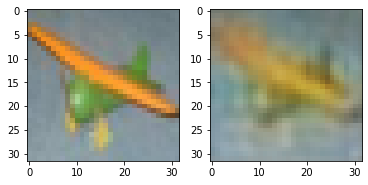

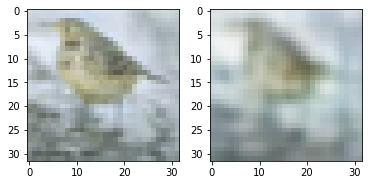

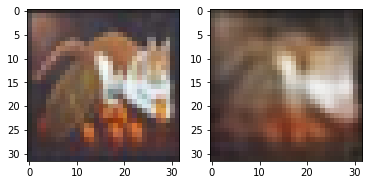

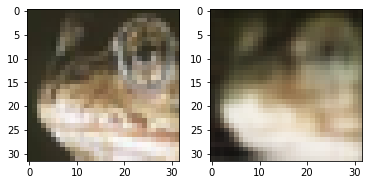

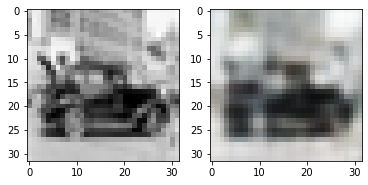

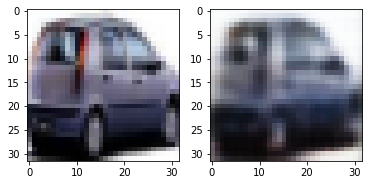

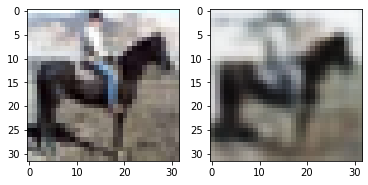

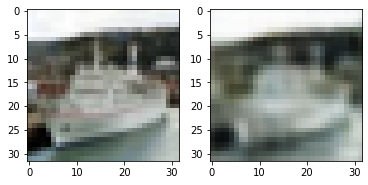

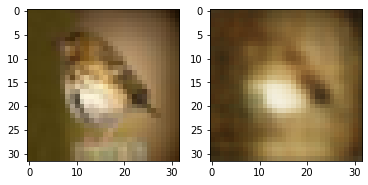

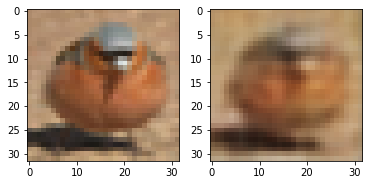

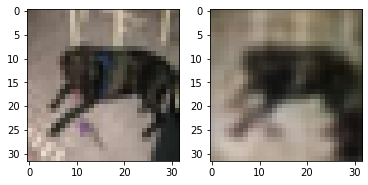

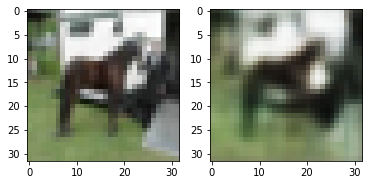

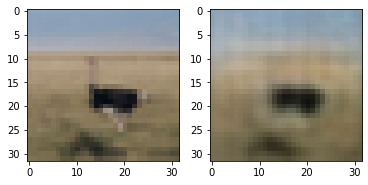

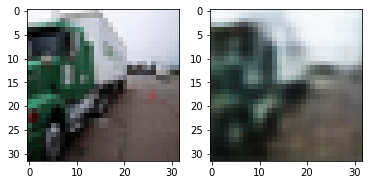

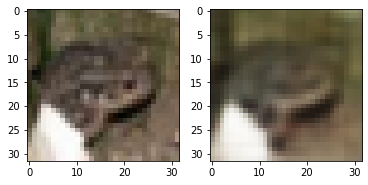

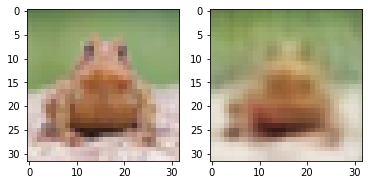

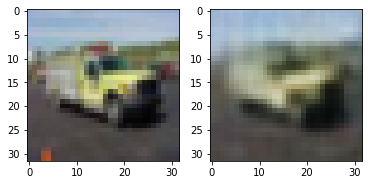

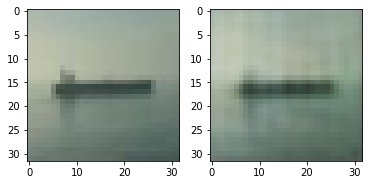

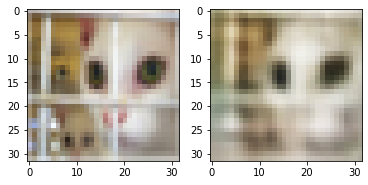

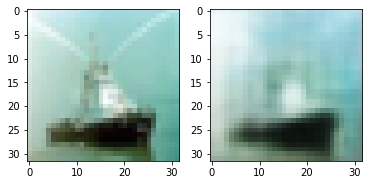

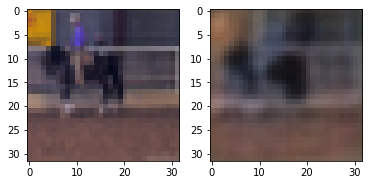

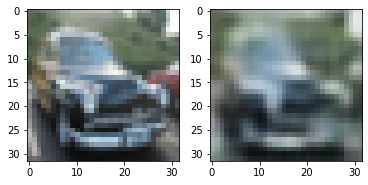

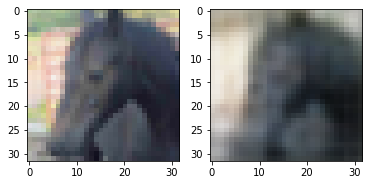

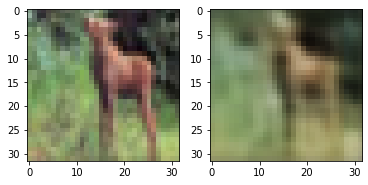

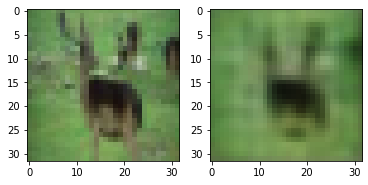

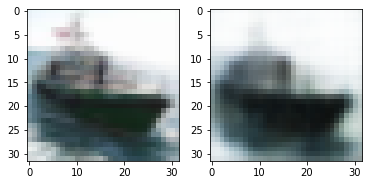

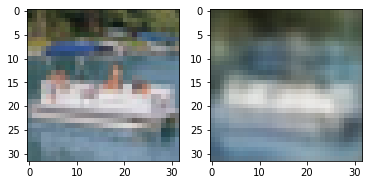

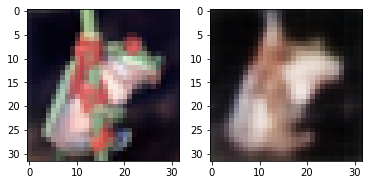

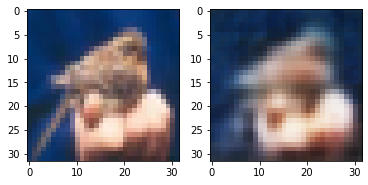

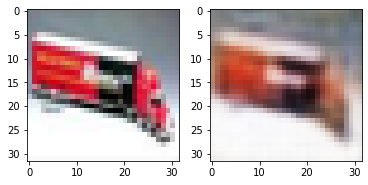

In [268]:
for i in range(more_loss_encoded_imgs.shape[0]):
    f,axs = plt.subplots(1,2)
    axs[0].imshow(more_loss_tensor[i])
    axs[1].imshow(more_loss_encoded_imgs[i])

## 4d

In [272]:
hyperparams = {
    'learning_rate' : [0.1, 0.01, 0.0001],
    'batch_size' : [32, 128, 256]
}

learning_rate=1e-3
max_epochs = 15
losses = []

for learning_rate in hyperparams['learning_rate']:
    loss_ = []
    torch.manual_seed(ucard_no) 
    #Choose mean square error loss
    criterion = nn.MSELoss() 
    #Choose the Adam optimiser
    optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)

    #Start training
    for epoch in range(max_epochs):
        for noised_, img_ in noised_trainloader:
            optimizer.zero_grad()
            recon = myAE(noised_)
            loss = criterion(recon, img_)
            loss.backward()
            optimizer.step()            
        if (epoch % 3) == 0:
            print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
            loss_.append(float(loss))
    losses.append(loss_)

Epoch:1, Loss:0.3027
Epoch:4, Loss:0.3485
Epoch:7, Loss:0.3150
Epoch:10, Loss:0.3002
Epoch:13, Loss:0.3114
Epoch:1, Loss:0.3159
Epoch:4, Loss:0.0753
Epoch:7, Loss:0.0588
Epoch:10, Loss:0.0615
Epoch:13, Loss:0.0581
Epoch:1, Loss:0.0632
Epoch:4, Loss:0.0746
Epoch:7, Loss:0.0586
Epoch:10, Loss:0.0616
Epoch:13, Loss:0.0581


In [275]:
hyperparams = {
    'learning_rate' : [0.1, 0.01, 0.0001],
    'batch_size' : [32, 128, 256]
}

learning_rate=1e-3
max_epochs = 10
learning_rate_loss = []

learning_rate_models = []

for learning_rate in hyperparams['learning_rate']:
    loss_ = []
    model = Autoencoder()
    torch.manual_seed(ucard_no) 
    #Choose mean square error loss
    criterion = nn.MSELoss() 
    #Choose the Adam optimiser
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

    #Start training
    for epoch in range(max_epochs):
        for noised_, img_ in noised_trainloader:
            optimizer.zero_grad()
            recon = model(noised_)
            loss = criterion(recon, img_)
            loss.backward()
            optimizer.step()            
        if (epoch % 1) == 0:
            print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
            loss_.append(float(loss))
    learning_rate_loss.append(loss_)
    learning_rate_models.append(model)

Epoch:1, Loss:0.0632
Epoch:2, Loss:0.1195
Epoch:3, Loss:0.0675
Epoch:4, Loss:0.2351
Epoch:5, Loss:0.2781
Epoch:6, Loss:0.2901
Epoch:7, Loss:0.2769
Epoch:8, Loss:0.3400
Epoch:9, Loss:0.3181
Epoch:10, Loss:0.3184
Epoch:1, Loss:0.0093
Epoch:2, Loss:0.0090
Epoch:3, Loss:0.0078
Epoch:4, Loss:0.0111
Epoch:5, Loss:0.0086
Epoch:6, Loss:0.0088
Epoch:7, Loss:0.0090
Epoch:8, Loss:0.0081
Epoch:9, Loss:0.0136
Epoch:10, Loss:0.0121
Epoch:1, Loss:0.0203
Epoch:2, Loss:0.0164
Epoch:3, Loss:0.0144
Epoch:4, Loss:0.0145
Epoch:5, Loss:0.0141
Epoch:6, Loss:0.0135
Epoch:7, Loss:0.0112
Epoch:8, Loss:0.0112
Epoch:9, Loss:0.0110
Epoch:10, Loss:0.0136


In [276]:
hyperparams = {
    'learning_rate' : [0.1, 0.01, 0.0001],
    'batch_size' : [32, 128, 256]
}

learning_rate=1e-3
max_epochs = 10
losses = []

batch_size_models = []

for batchsize in hyperparams['batch_size']:
    loss_ = []
    model = Autoencoder()
    torch.manual_seed(ucard_no) 
    #Choose mean square error loss
    criterion = nn.MSELoss() 
    #Choose the Adam optimiser
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    noised_trainloader = data.DataLoader(noised_trainset, batch_size=batchsize, shuffle=True)
    #Start training
    for epoch in range(max_epochs):
        for noised_, img_ in noised_trainloader:
            optimizer.zero_grad()
            recon = model(noised_)
            loss = criterion(recon, img_)
            loss.backward()
            optimizer.step()            
        if (epoch % 1) == 0:
            print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
            loss_.append(float(loss))
    losses.append(loss_)
    batch_size_models.append(model)

Epoch:1, Loss:0.0090
Epoch:2, Loss:0.0072
Epoch:3, Loss:0.0065
Epoch:4, Loss:0.0067
Epoch:5, Loss:0.0068
Epoch:6, Loss:0.0066
Epoch:7, Loss:0.0060
Epoch:8, Loss:0.0064
Epoch:9, Loss:0.0058
Epoch:10, Loss:0.0064
Epoch:1, Loss:0.0128
Epoch:2, Loss:0.0104
Epoch:3, Loss:0.0090
Epoch:4, Loss:0.0092
Epoch:5, Loss:0.0079
Epoch:6, Loss:0.0073
Epoch:7, Loss:0.0076
Epoch:8, Loss:0.0073
Epoch:9, Loss:0.0064
Epoch:10, Loss:0.0066
Epoch:1, Loss:0.0178
Epoch:2, Loss:0.0134
Epoch:3, Loss:0.0120
Epoch:4, Loss:0.0114
Epoch:5, Loss:0.0098
Epoch:6, Loss:0.0088
Epoch:7, Loss:0.0088
Epoch:8, Loss:0.0087
Epoch:9, Loss:0.0075
Epoch:10, Loss:0.0083


## 4e

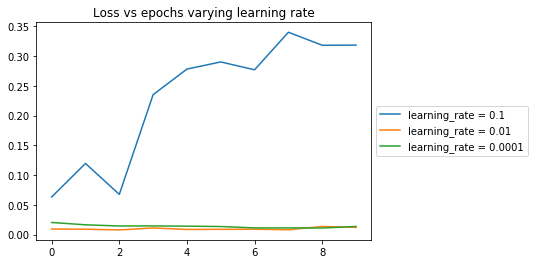

In [311]:
plt.figure(200).clf()
for plot_loss_,plot_name_ in zip(learning_rate_loss,hyperparams['learning_rate']):
    plt.plot(range(10), plot_loss_, label=f'learning_rate = {plot_name_}')
plt.title('Loss vs epochs varying learning rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

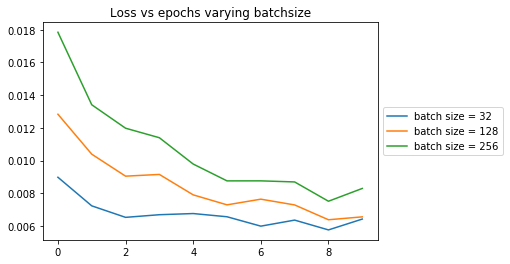

In [296]:
plt.figure(100).clf()
for plot_loss_,plot_name_ in zip(losses,hyperparams['batch_size']):
    plt.plot(range(10), plot_loss_, label=f'batch size = {plot_name_}')
plt.title('Loss vs epochs varying batchsize')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Observations

- When the learning rate is very high(0.1), the loss instead of decreasing with every epoch it started increasing. The reason might be the gradient may be very high and due to high learning rate insteading of converging to local minima it is oscilating with huge amplitude. The loss is decreasing faster with increase in learning rate.
- Training time is inversely proportional to batch size. With a smaller batch size the network is converging faster. The first epoch loss for small batch size is lesser when compared with the bigger batches.